# 支持向量机-心脏病预测

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
plt.rcParams['font.family'] = 'SimHei' #使plt图表可以显示中文

## 1、数据清洗

- age：年龄
- sex：性别（1代表男性，0代表女性）
- chest_pain：胸部疼痛情况（1：典型心绞痛；2：非典型心绞痛；3：没有心绞痛；4：无症状）
- blood_pressure：静息血压
- serum_cholestoral：胆固醇
- fasting_blood_sugar：空腹血糖>120mg （1：true；2：false）
- electrocardiographic：静息心电图测量（0：普通；1：ST-T波异常；2：左心室肥大）
- max_heart_rate：最高心跳率
- induced_angina：运动诱发心绞痛（1：yes；2：no）
- ST_depression：运动相对于休息引起的ST抑制
- slope：运动ST段的峰值斜率（1：上坡；2：平的；3：下坡）
- vessels：主要血管数目（0、1、2、3、4）
- thal：一种血液疾病（1：正常；2：固定缺陷；3：可逆的缺陷）
- diagnosis：患病情况（0：无心脏病；1：一级心脏病；2：2级心脏病；3：三级心脏病）
- target：是否患病（1：yes；0：no）（后面加上的）


In [2]:
# 行名
header_row = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

# 读取数据
heart = pd.read_excel('d:\\总表.xlsx',header=None, names=header_row)
heart

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,48,0,2,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0
916,36,1,2,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0
917,48,1,3,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0
918,47,0,2,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0


In [3]:
#删除缺失值为两个及以上的数据
heart.drop_duplicates(inplace=True)
heart.dropna(thresh=13,inplace=True)
heart

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,40,0,4,150.0,392.0,0.0,0.0,130.0,0.0,2.0,2.0,NaN,6.0,2
749,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,4
810,46,1,4,110.0,238.0,0.0,1.0,140.0,1.0,1.0,2.0,NaN,3.0,0
839,56,1,3,130.0,276.0,0.0,0.0,128.0,1.0,1.0,1.0,NaN,6.0,0


In [4]:
heart.isnull().any() #找出还剩哪些属性有缺失值

age                     False
sex                     False
chest_pain              False
blood_pressure          False
serum_cholestoral       False
fasting_blood_sugar     False
electrocardiographic    False
max_heart_rate          False
induced_angina          False
ST_depression           False
slope                   False
vessels                  True
thal                     True
diagnosis               False
dtype: bool

In [5]:
heart.fillna({'vessels':heart['vessels'].mean(),'thal':heart['thal'].mean()},inplace=True) #用平均值填充'vessels'和'thal'数据

In [6]:
# 归一化
from sklearn import preprocessing
preprocessing.Normalizer().fit_transform(heart)
#新增 target列
#如果diagnosis=0，说明没有心脏病，target=0。若diagnosis>=1,说明有心脏病，target=1.方便二分类
heart_d = heart[heart["diagnosis"] >= 1 ]
heart.loc[:, "target"] = heart.loc[:, "diagnosis"].apply(lambda x: 1 if x >= 1 else 0)

## 2、数据分析可视化

### 统计值

In [7]:
heart.describe()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis,target
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,54.727273,0.719251,3.267380,132.163102,215.470588,0.139037,0.887701,143.631016,0.398396,1.010963,1.663102,0.695364,4.959569,1.106952,0.537433
std,9.009108,0.449967,0.928058,17.885025,96.624244,0.346449,0.964912,25.917433,0.490224,1.114906,0.607263,0.943403,1.934860,1.263768,0.499265
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,197.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,4.000000,130.000000,233.000000,0.000000,0.000000,146.500000,0.000000,0.800000,2.000000,0.695364,6.000000,1.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,163.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,4.000000,1.000000


### 各项特征值分布情况

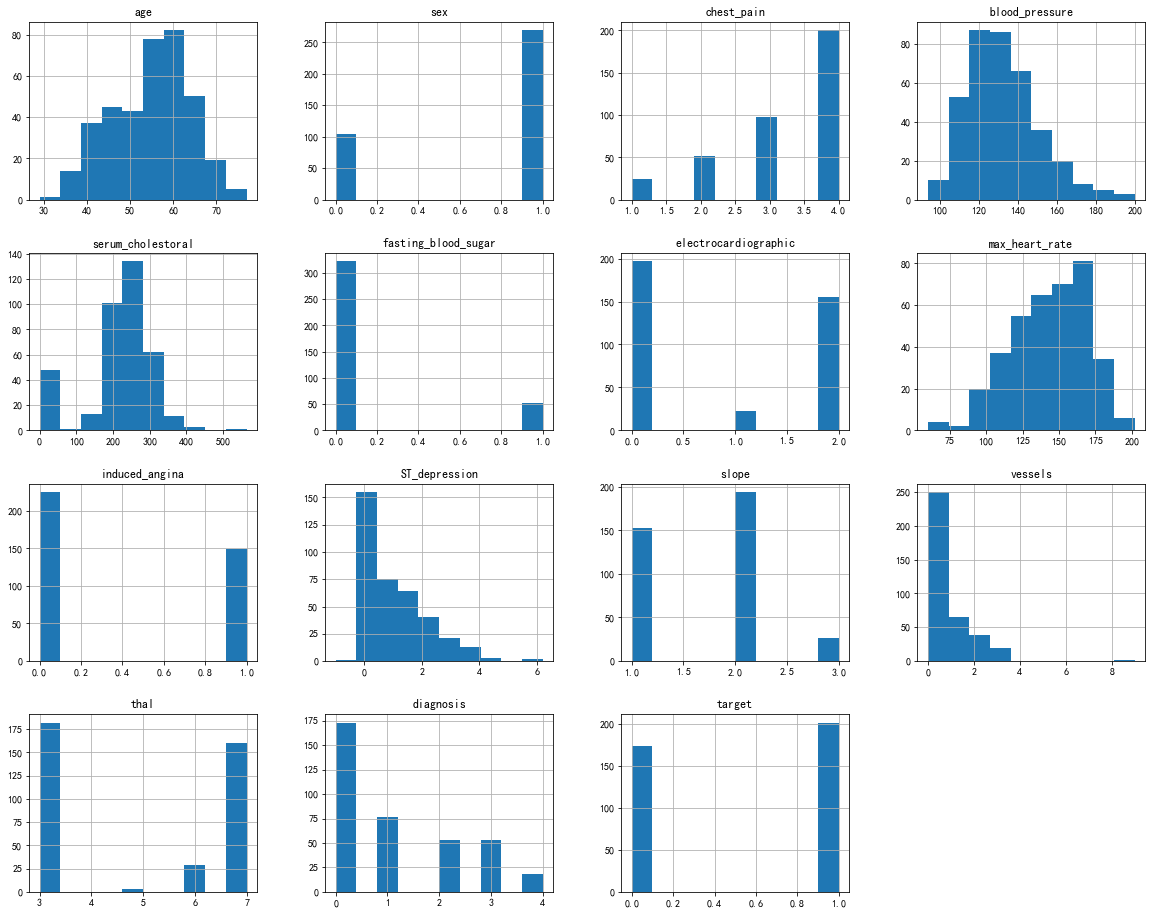

In [10]:
heart.hist(figsize=(20,16)) 
plt.show()

### 患病分布情况

<AxesSubplot:ylabel='target'>

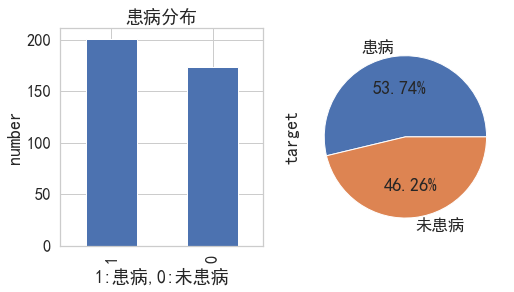

In [62]:
heart_counts = heart['target'].value_counts()
# 设置画布fig，图像对象axes
fig,axes = plt.subplots(1,2,figsize=(8,4))  #创建1行2列的画布，并设置画布大小
# 绘制条形图
ax = heart_counts.plot(kind='bar',ax=axes[0])  #绘制条形图,画在第0个子图上,并返回axes对象
ax.set_title('患病分布')  #设置标题
ax.set_xlabel('1:患病,0:未患病')  # x轴名称
ax.set_ylabel('number')  # y轴名称
# 绘制饼图，显示数值保留两位小数，显示%，数值对应的标签名
heart_counts.plot(kind='pie',autopct='%.2f%%',labels=['患病','未患病'])


### 年龄与患病分析

Text(0.5, 1.0, '年龄-患病关系1')

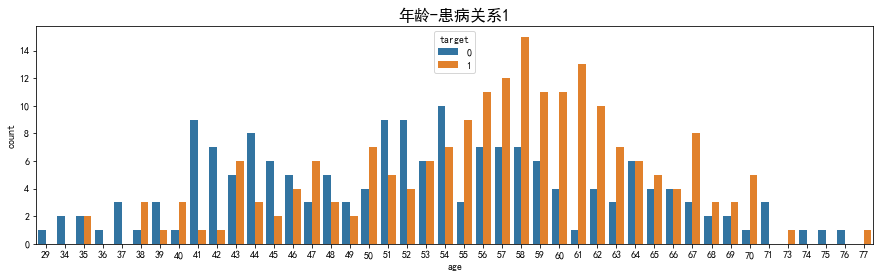

In [11]:
# 设置画布大小，并设置2行1列
fig,axes = plt.subplots(figsize=(15,4))
# 每个年龄有多少人患病、有多少人没患病，绘制条形图
sns.countplot(x='age',hue='target',data=heart,ax=axes)
axes.set_title('年龄-患病关系1',fontsize=16)

- 如果笼统的将每个年龄都分一个x轴刻度，会非常混乱，因此我们再来划分一下年龄段。由于该数据中，年龄最小为29，最大为77，因此我们划分[0,45)为青年，[45,59)为中年，60以上为老年。

Text(0.5, 1.0, '年龄-患病关系2')

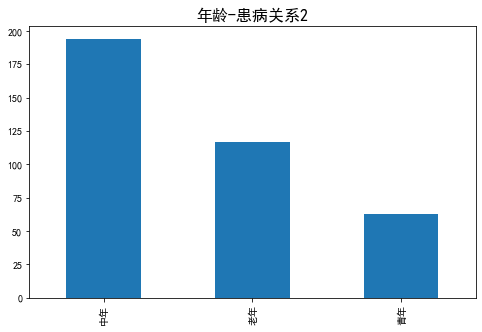

In [12]:
fig,axes2 = plt.subplots(figsize=(8,5))
# 对age数据按bins划分的区间分组，左闭右开，labels设置分组名
age_cut = pd.cut(heart.age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['青年','中年','老年'])
# 统计绘图，条形图，每个年龄段有多少人
age_cut.value_counts().plot(kind='bar')
axes2.set_title('年龄-患病关系2',fontsize=16)

- 我们完成了年龄的划分，现在需要将划分好的年龄段，与是否患病拼接在一起。绘制条形图：每个年龄段患病和没患病的分别有多少人；绘制饼图：患病的人中三个年龄段的占比，以及在没患病的人中三个年龄段的占比。

- 该函数将两个Series或DataFrame数据拼接到一起，axis=1列方向拼接，axis=0行方向拼接

Text(0.5, 1.0, '没患病-年龄关系')

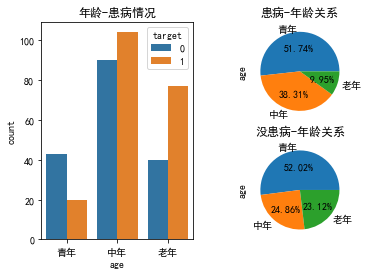

In [21]:
# 指定水平方向拼接，指定轴axis=1
age_target_df = pd.concat([age_cut,heart['target']],axis=1)
 
# 绘制条形图，每个年龄段有多少人得病，有多少人没得病
plt.figure()
ax4 = plt.subplot(121)
sns.countplot(x='age',hue='target',data=age_target_df,ax=ax4)
ax4.set_title('年龄-患病情况')
 
# 饼图，绘制患病的人中，每个年龄段所占比例
ax5 = plt.subplot(222)
# 所有患病的人中，对年龄特征计数
age_target_df[age_target_df.target==1].age.value_counts().plot(kind='pie',autopct='%.2f%%',labels=['青年','中年','老年'],ax=ax5)
ax5.set_title('患病-年龄关系')
 
# 饼图，绘制没有患病的人中，每个年龄段的比例
ax6 = plt.subplot(224)
age_target_df[age_target_df.target==0].age.value_counts().plot(kind='pie',autopct='%.2f%%',labels=['青年','中年','老年'],ax=ax6)
ax6.set_title('没患病-年龄关系')


- 心脏病与年龄与最大心率关系

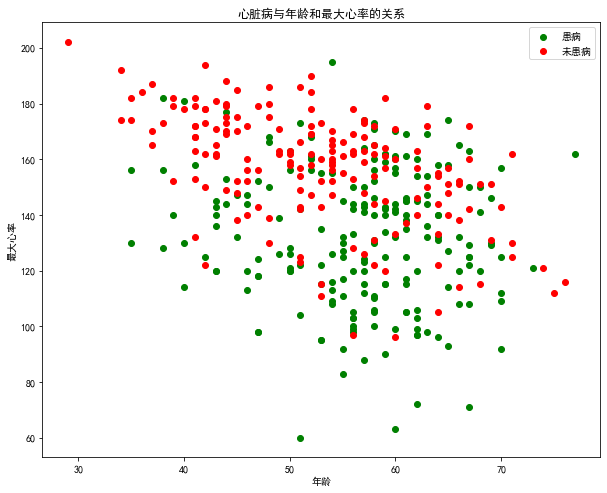

In [17]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(heart.age[heart.target==1],
            heart.max_heart_rate[heart.target==1],
            c="green")

# Scatter with negative examples
plt.scatter(heart.age[heart.target==0],
            heart.max_heart_rate[heart.target==0],
            c="red")

# Add some helpful info
plt.title("心脏病与年龄和最大心率的关系")
plt.xlabel("年龄")
plt.ylabel("最大心率")
plt.legend(["患病", "未患病"]);

### 性别与患病的分布

- 绘制条形图，x轴代表性别，y轴代表人数，其中男性和女性分成患病的和没患病的。

使用seaborn库画图，其中.countplot() 绘图函数，自动计算性别'sex'中的人数，以'sex'的种类分x轴刻度，每个x轴下又以'target'进行划分，返回axes对象，data 代表绘图所需的数据，ax=ax1表示这张图的绘图位置。

- 绘制条形图，x轴代表性别，y轴代表人数，其中男性和女性分成患病的和没患病的。

使用seaborn库画图，其中.countplot() 绘图函数，自动计算性别'sex'中的人数，以'sex'的种类分x轴刻度，每个x轴下又以'target'进行划分，返回axes对象，data 代表绘图所需的数据，ax=ax1表示这张图的绘图位置。


- 根据是否患病绘制饼图，即在患病的人中男性和女性分别占了百分之几，以及在没患病的人中男性和女性分别占比多少。

其中 heart[heart['target']==0] 表示找出所有没有患病（target为0）的所有的行，然后 .sex 为找到指定所有没患病的数据中的'sex'特征列，最后 .value_counts(）函数自动计算该列中所有唯一值出现的次数。


Text(0.5, 1.0, '患病比例')

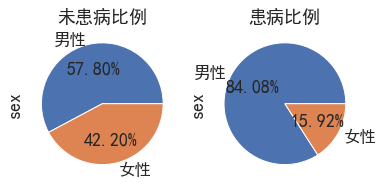

In [66]:
# 先找到没有患病的人的性别统计
ax2 = plt.subplot(121)  #该图在画布上的位置，1行2列中的第1个位置
heart_no_counts = heart[heart['target']==0].sex.value_counts()  #获取没患病的，锁定sex列，统计
heart_no_counts.plot(kind='pie',autopct='%.2f%%',labels=['男性','女性'],ax=ax2)
ax2.set_title('未患病比例')
 
# 再找到患病的性别统计
ax3 = plt.subplot(122)
heart_yes_counts = heart[heart['target']==1].sex.value_counts()
heart_yes_counts.plot(kind='pie',autopct='%.2f%%',labels=['男性','女性'],ax=ax3)
ax3.set_title('患病比例')


### 特征之间相关性

In [8]:
# 计算特征值之间相关性
corr = heart.corr()

(15.5, -0.5)

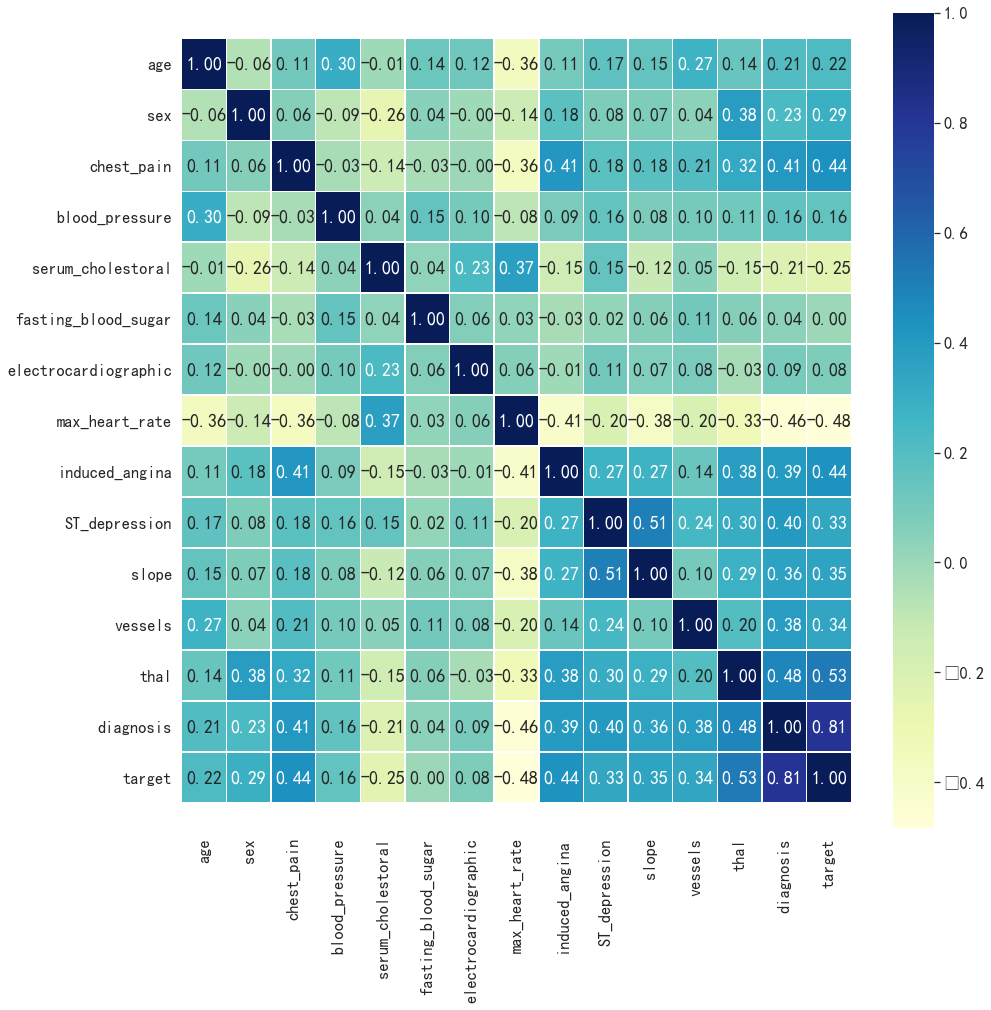

In [75]:
# 相关性表可视化
corr_matrix = heart.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

从特征值中可以看出，chest_pain,induced_angina和thal与是否患有心脏病相关性最高。所以下面我们针对这三个数据进行了分析。

##### - 运动引起的心绞痛-胸痛-患病关系

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


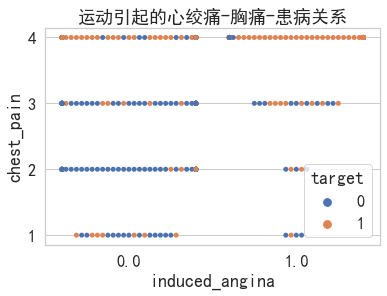

In [60]:
sns.swarmplot(x='induced_angina', y='chest_pain', hue='target', data=heart, size=5).set_title('运动引起的心绞痛-胸痛-患病关系')
plt.xlabel('induced_angina')
plt.show()

- 运动引起的心绞痛-地中海贫血-患病关系

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


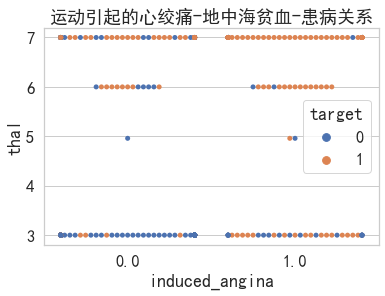

In [69]:
plt.rcParams['font.family'] = 'SimHei'
sns.swarmplot(x='induced_angina', y='thal', hue='target', data=heart, size=5).set_title('运动引起的心绞痛-地中海贫血-患病关系')
plt.show()

- 心脏病和chest_pain心绞痛类型之间的关系

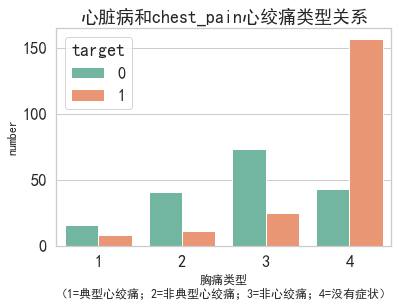

In [68]:
plt.rcParams['font.family'] = 'SimHei'
cpDf = heart[['chest_pain','target']]
sns.countplot(data = cpDf,x ='chest_pain',hue='target',palette='Set2').set_title('心脏病和chest_pain心绞痛类型关系')
plt.xlabel('胸痛类型\n（1=典型心绞痛；2=非典型心绞痛；3=非心绞痛；4=没有症状）',fontsize=12)
plt.ylabel('number',fontsize=12)
sns.set_style("whitegrid")
plt.show()


## 3、建立SVM模型

- 分割数据集,并进行归一化处理

In [22]:
x = heart.iloc[ :, [2,8,12]].values.astype(float)
y = heart.iloc[ :,-1].values.astype(int)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.35, random_state=1)

- 尝试了各个核函数，最终选择了准确率最高的poly

In [23]:
from sklearn.svm import SVC #建SVM分类器
from sklearn.metrics import accuracy_score
svm=SVC(kernel='poly',probability=True)
model=svm.fit(x_train,y_train)
y_pred=model.predict(x_test)

## 4、模型性能评估

- 准确率

In [24]:
score_svm = round(accuracy_score(y_pred,y_test)*100,2)
print("支持向量机的准确率: "+str(score_svm)+"%")

支持向量机的准确率: 83.21%


- 混淆矩阵

In [25]:
y_predict_log = model.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predict_log)

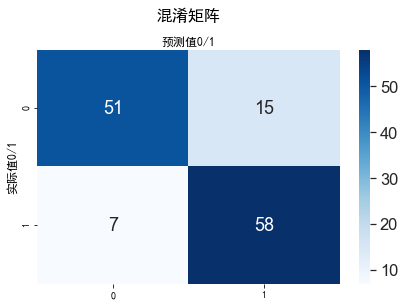

In [27]:
#混淆矩阵美化
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)


    sns.set(font_scale=1.5)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('实际值0/1',fontsize=12)
    plt.xlabel('预测值0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'混淆矩阵')

- 交叉验证法

交叉验证法计算模型准确率的方法可以这样理解，例如，将模型分成3等分。首先，将1、2份数据用于训练，第3份数据用于测试；再将1、3份数据用于训练，第2份数据用于测试；再将2、3份数据用于训练，第1份数据用于测试。这样，每一份数据都有机会用于训练和测试。提高了计算准确率。
导入方法： from sklearn.model_selection import cross_val_score
计算方法： cross_val_score(算法对象, 未划分的特征值, 目标值)


In [28]:
# 导入交叉验证法--检测模型准确率
from sklearn.model_selection import cross_val_score
# 传入算法对象、x特征值、y目标值、cv=几等分
cross = cross_val_score(model,x,y)  
result_cross = cross.mean()  #计算交叉验证的平均值

In [29]:
print("交叉验证的平均值: "+str(result_cross))

交叉验证的平均值: 0.7755315315315316


- 精准率

精准率用来计算查得准不准

In [30]:
from sklearn.metrics import precision_score
# 传入真实值和预测值
result_precision = precision_score(y_test,y_pred)

In [31]:
print("精准率: "+str(result_precision))

精准率: 0.7945205479452054


- 召回率

召回率用来计算查得全不全

In [32]:
from sklearn.metrics import recall_score
result_recall = recall_score(y_test,y_pred)
print("召回率: "+str(result_recall))

召回率: 0.8923076923076924


- F1-score综合指标

综合了精准率和召回率来计算

In [33]:
from sklearn.metrics import f1_score
result_f1 = f1_score(y_test,y_pred)
print("F1-score综合指标: "+str(result_f1))

F1-score综合指标: 0.8405797101449275


Text(0, 0.5, 'TPR')

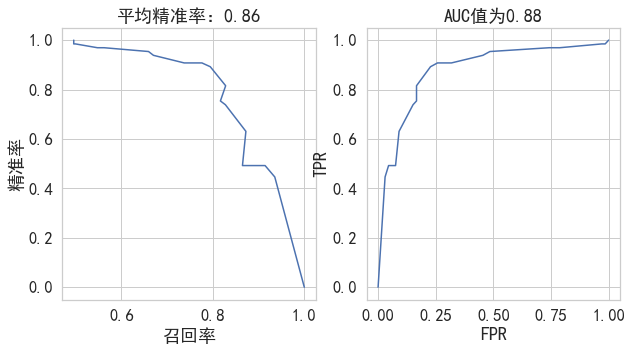

In [72]:
plt.rcParams['font.family'] = 'SimHei'
# 精准率和召回率曲线绘制
from sklearn.metrics import precision_recall_curve
# 参数：y真实值，预测到的概率，
# 预测概率，第一列存放，得了心脏病的概率
y_predict_proba =model.predict_proba(x_test)
# 第1列存放预测到得了心脏病的概率
# 返回值是一个元组，分别是，精准率，召回率，阈值（大于多少判定为是心脏病）
precisions,recalls,thretholds = precision_recall_curve(y_test,y_predict_proba[:,1])
 
# 计算平均精准率
from sklearn.metrics import average_precision_score
# 参数：y_true真实值，y_score预测到的概率
precisions_average = average_precision_score(y_test,y_predict_proba[:,1])
 
# 绘图，召回率x轴，精准率y轴
fig,axes = plt.subplots(1,2,figsize=(10,5)) #设置画布，1行2列
# 在第一张画布上绘图
axes[0].plot(precisions,recalls) #横坐标精确率，纵坐标召回率
axes[0].set_title(f'平均精准率：{round(precisions_average,2)}')
axes[0].set_xlabel('召回率')
axes[0].set_ylabel('精准率')

# ROC曲线绘制
from sklearn.metrics import roc_curve
# 传入参数：y_true真实值，y_predict_proba预测到的概率
# 产生返回值，FP、TP、阈值
fpr,tpr,thretholds = roc_curve(y_test,y_predict_proba[:,1])
# 计算AUC得分
from sklearn.metrics import auc
# 传入参数：fpr、tpr
AUC = auc(fpr,tpr) 
 
# 绘图
axes[1].plot(fpr,tpr) #传入FP和TP的值
axes[1].set_title(f'AUC值为{round(AUC,2)}')
axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')


图1中x轴为召回率，y轴为精准率。曲线越靠近右上角，召回率越接近1，精准率越接近1。则左下部分的面积越大，模型越好。


图2中以FP为x轴，TP为y轴。FP为预测结果为正例，实际上是假例。TP为预测结果是正例，实际上也是正例。曲线越靠近左上角越好 ，FP=0，TP=1。右下部面积越大越好。AUC得分为ROC曲线右下部分面积
